## Udacity NanoDegree : P4 ( Behavioral Cloning )
This file contains the data visualization. It contains the following:
1. See the number of image dataset samples being used in the network.
2. Visualize the augmented image (crop and flipped)
3. See the data distribution ( original and modified ) using histograms.

In [5]:
import cv2
import pandas as pd
import numpy as np
import process_data
from sklearn.utils import shuffle
from scipy.stats import norm
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

## Step 1 : Read the number of training and validation samples from the image dataset

In [6]:
udacity_data, my_data = process_data.initialize_file_paths()
train_samples, validation_samples = process_data.process_csv(udacity_data, my_data)
print("Number of Training Samples: "+str(len(train_samples)))
print("Number of Validation Samples: "+str(len(validation_samples)))

train_df = pd.DataFrame(train_samples)

# Udacity images:  8036
# Recorded images 10772
Total:  18808
Number of Training Samples: 15046
Number of Validation Samples: 3762


## Step 2 : Display the original image along with the augmented images

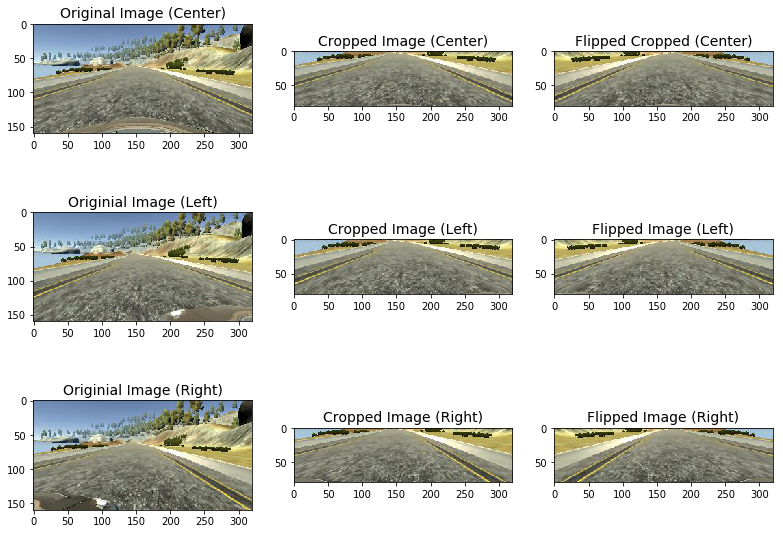

In [3]:
f, ((ax1, ax2, ax3) , (ax4, ax5, ax6), (ax7,ax8, ax9)) = plt.subplots(3, 3, figsize=(11, 8))
f.tight_layout()

ax1.imshow(cv2.cvtColor(cv2.imread(train_samples[100][0]),cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image (Center)', fontsize=14)

ax2.imshow(cv2.cvtColor(cv2.imread(train_samples[100][0])[60:140,:],cv2.COLOR_BGR2RGB))
ax2.set_title('Cropped Image (Center)', fontsize=14)

ax3.imshow(cv2.cvtColor(cv2.flip(cv2.imread(train_samples[100][0])[60:140,:],1),cv2.COLOR_BGR2RGB))
ax3.set_title('Flipped Cropped (Center)', fontsize=14)

ax4.imshow(cv2.cvtColor(cv2.imread(train_samples[100][1]),cv2.COLOR_BGR2RGB))
ax4.set_title('Originial Image (Left)', fontsize=14)

ax5.imshow(cv2.cvtColor(cv2.imread(train_samples[100][1])[60:140,:],cv2.COLOR_BGR2RGB))
ax5.set_title('Cropped Image (Left)', fontsize=14)

ax6.imshow(cv2.cvtColor(cv2.flip(cv2.imread(train_samples[100][1])[60:140,:],1),cv2.COLOR_BGR2RGB))
ax6.set_title('Flipped Image (Left)', fontsize=14)

ax7.imshow(cv2.cvtColor(cv2.imread(train_samples[100][2]),cv2.COLOR_BGR2RGB))
ax7.set_title('Originial Image (Right)', fontsize=14)

ax8.imshow(cv2.cvtColor(cv2.imread(train_samples[100][2])[60:140,:],cv2.COLOR_BGR2RGB))
ax8.set_title('Cropped Image (Right)', fontsize=14)

ax9.imshow(cv2.cvtColor(cv2.flip(cv2.imread(train_samples[100][2])[60:140,:],1),cv2.COLOR_BGR2RGB))
ax9.set_title('Flipped Image (Right)', fontsize=14)

(80, 320)
(80, 320, 3)


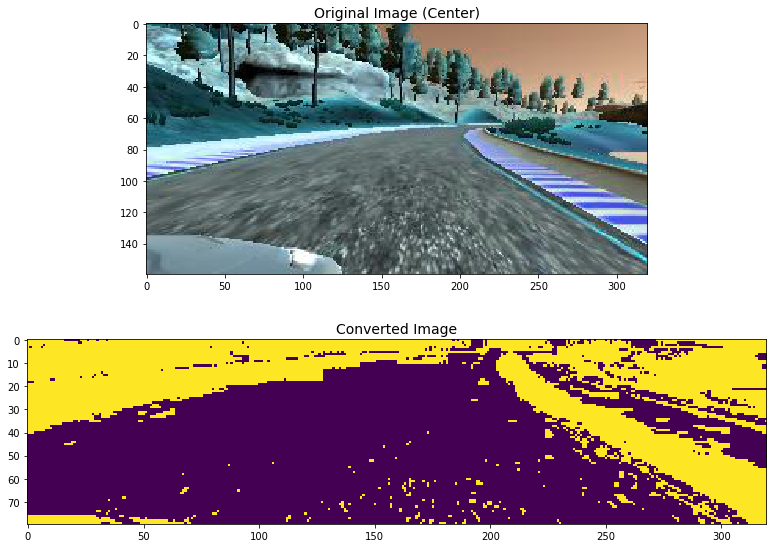

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 8))
f.tight_layout()

img = cv2.imread(train_samples[112][2])

ax1.imshow(img)
ax1.set_title('Original Image (Center)', fontsize=14)

combined_image = process_data.pre_process_image(img, convert_to_binary=True)
print(combined_image.shape)
#combined_image = np.multiply(combined_image,255)
color_warp = np.dstack((combined_image, combined_image, combined_image))
print(color_warp.shape)

ax2.imshow(combined_image)
ax2.set_title("Converted Image", fontsize=14)

## Step 3: Generate histograms for the original data distribution and uniform data distribution of the steering angles for the image dataset

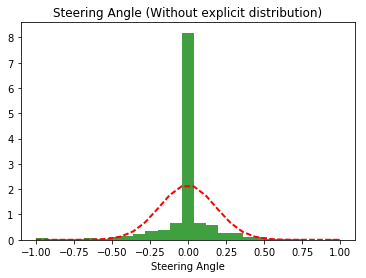

In [8]:
# Original data distribution

(mu, sigma) = norm.fit(np.asarray(train_df[3], dtype='float'))
n, bins, patches = plt.hist(np.asarray(train_df[3], dtype='float'), bins=25,normed=1, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.title("Steering Angle (Without explicit distribution)")
plt.xlabel("Steering Angle")
plt.savefig("images/original_distribution.png")
plt.show()

In [9]:
uniform_distribution = process_data.uniform_split_data(np.array(train_df))

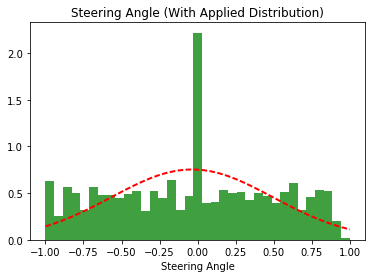

In [10]:
# Explicitly uniformed data distribution

(mu, sigma) = norm.fit(np.asarray(uniform_distribution[:,3], dtype='float'))
n, bins, patches = plt.hist(np.asarray(uniform_distribution[:,3], dtype='float'), bins=35,normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.title("Steering Angle (With Applied Distribution)")
plt.xlabel("Steering Angle")
plt.savefig("images/applied_distribution.png")
plt.show()